# **<span style="color:rgba(220, 20, 60, 1);"> Full ETH in Dual Unitary Circuits</span>**

## Initialization

**HTML and CSS** - **Run the cell below to get the correct formatting**:

In [2]:
%%html
<!-- Colors: https://encycolorpedia.com/-->
<!-- commutatorents ommited due to a bug in Jupyter-->

<style>

    h1 { 
        font-size: 30px; 
        color: rgba(220, 20, 60, 1) !important;  
    }

    h2 {
     font-size: 25px;
     color: rgba(255, 140, 0, 1); /* Orange */		 
    }	 

    h3 {
     font-size: 20px;
     color:rgba(204, 85, 0, 1); /* Dark orange */		 
    }	 
        
    td {
      text-align: center;
    }

    div.highlight_red {    
        background-color: rgba(179, 0, 0, .1);
        background-opacity : 0.5;
        }

    div.highlight_red .title_box {
        background-color: rgba(179, 0, 0, .6);
        width: 100%;
    }

    div.highlight_green {    
        background-color: rgba(	19, 98, 7, .1);
        background-opacity : 0.5;
        }

    div.highlight_green .title_box {
        background-color: rgba(	19, 130, 7, .6);
        width: 100%;
    }

    div.highlight_turquoise {    
        background-color: rgba(	40, 154, 164, .1);
        background-opacity : 0.5;
        }

    div.highlight_turquoise .title_box {
        background-color: rgba(	40, 154, 164, .6);
        width: 100%;
    }

    div.highlight_purple {    
        background-color: rgba(120, 81, 169, .1);
        background-opacity : 0.5;
        }

    div.highlight_purple .title_box {
        background-color: rgba(120, 81, 169, .6);
        width: 100%;
    }

    div.highlight_blue {    
        background-color: rgba(	65, 105, 225, .1);
        background-opacity : 0.5;
    }

    div.highlight_blue .title_box {
        background-color: rgba(	65, 105, 225, .6);
        width: 100%;
    }

    .title{
        text-indent: 1%;
        padding: .25em;
        font-weight: bold;
        font-size: 18px;
        color : white;
    }

    .content{
        text-indent: 2%;
        padding: 1em;
        font-size: 14px;
    }

</style>

### Installation

<div class=warn>
To properly run this notebook, install matplotlib and, if necessary, Jupyter lab.
</div>

- Install conda:

```
conda create --name eth_env
conda activate eth_env
```

- Install the packages:

```
conda install -c conda-forge jupyterlab matplotlib  cipy; 
```

- Finally, a lot of important functions pertaining the FP computations are found in the ```cumulants.py``` file. Functions and routines for the (integrable) DU circuit can be found in the folder ```du_circuits```

### Packages

In [3]:
%matplotlib inline

#Load necessary packages
import math
import itertools
import numpy as np 
import scipy as scp
import matplotlib
import matplotlib.pyplot as plt
from scipy.linalg import eigh, expm 
from scipy import stats
from functools import reduce
from functools import partial as partial_fun
import operator

# Custom libraries/external files
import random_matrix as rmt
import quantum_many_body as qmb
from  quantum_many_body import pauli_matrices as sigma
import random_circuits as rc
import du_circuits.src.dual_unitary as du
import free_probability as fp
from utils import *

## A minimal example

### Otoc decomposition

In [4]:
# Fixed SU2 disorders
np.random.seed(0) 
u1 = scp.stats.unitary_group.rvs(2)
u2 = scp.stats.unitary_group.rvs(2)

# We fix system size and anisotropy
L = 7
Jz = 1/np.sqrt(10)
t_lst = np.arange(8)

We can create the floquet operator with routines in the file `random_circuits`. Note that the routines in the file look somewhat complicated due to their generality. Applying a simple brickwork structure is very simple and can be done even without this file "by hand". 

Meanwhile, we pass unitaries to the class `FreeModel` in the file `free_probability`. This class handles the models/computation of diagrams.

We thus have:

In [5]:
unitary = rc.floquet_operator(L, U = rc.dual_unitary(J=Jz, u_tuples=(u1, u2, sigma.Id, sigma.Id)), periodic=False)
model = fp.FreeModel(unitary, unitary=True).diagonalize_operator(rc.op_local_circuit(L, op = sigma.Z), sorted_eigs=True)
model

For details, see:

In [6]:
help(fp.FreeModel)

Help on class FreeModel in module free_probability:

class FreeModel(builtins.object)
 |  FreeModel(model, unitary=True)
 |
 |  Calculates the cumulants from FP theory and relevant quantities for Quantum Chaos
 |
 |  Methods defined here:
 |
 |  __init__(self, model, unitary=True)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  compute_K2(self, t)
 |      Vectorizes the method.
 |
 |  compute_K2_freq(self, w)
 |      Vectorizes the method.
 |
 |  compute_K4(self, t)
 |      Vectorizes the method.
 |
 |  compute_K4_freq(self, w1, w2=None, w3=None)
 |      Vectorizes the method.
 |
 |  compute_K4_mixed(self, op_lst, t_lst)
 |
 |  compute_OTOC(self, t)
 |      Vectorizes the method.
 |
 |  compute_OTOC_freq(self, w1, w2=None, w3=None)
 |      Vectorizes the method.
 |
 |  compute_OTOC_mixed(self, op_lst, t_lst)
 |      Evaluates the OTOC <A_1(t_1) A_2(t_2) ... A_q(t_q)>.
 |
 |  compute_cactus(self, t1, t2=None)
 |      Vectorizes the method.
 |
 |  compute_ca

We can then choose which diagrams to compute:

In [9]:
diagrams = ['compute_OTOC', 'compute_K2', 'compute_K4', 'compute_crossing', 'compute_cactus']
diagram_results = [getattr(model, diagram)(t_lst) for diagram in diagrams]
otoc, k2, k4, crossing, cactus = diagram_results

We can see the decomposition of OTOCs:

/u/alvesgo/conda-envs/qrc_env/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/u/alvesgo/conda-envs/qrc_env/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


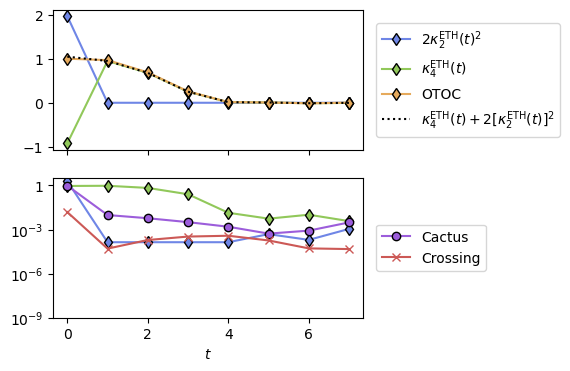

In [17]:
from matplotlib.patches import ConnectionPatch

fig, ax = plt.subplots(figsize=(4, 4), nrows=2, sharex=True)


# Plotting the diagrams
ax[0].plot(2*k2**2, label=r"$2\kappa_2^{\mathrm{ETH}}(t)^2$", color='#6F86E6', marker = "d", markeredgecolor="black")
ax[0].plot(k4, label=r"$\kappa_4^{\mathrm{ETH}}(t)$", color='#91C85A', marker = "d", markeredgecolor="black")
ax[0].plot(otoc, label=r"OTOC", color='#e6aa5c', marker = "d", markeredgecolor="black")
ax[0].plot(k4 + 2*k2**2, label=r"$\kappa_4^{\mathrm{ETH}}(t) + 2[\kappa_2^{\mathrm{ETH}}(t)]^2$", color="black", linestyle="dotted")

# Plotting the diagrams
ax[1].plot(np.abs(k4), color='#91C85A', marker = "d", markeredgecolor="black")
ax[1].plot(2*k2**2, color='#6F86E6', marker = "d", markeredgecolor="black")
ax[1].plot(np.abs(cactus), label=r"Cactus", color='#9C5DDB', marker = "o", markeredgecolor="black")
ax[1].plot(np.abs(crossing), label=r"Crossing", color="#CC5956", marker="x")

# Labels
ax[1].set_xlabel(r"$t$")

# Scale
ax[1].set_yscale('log')

# Legend
legend_0 = ax[0].legend(bbox_to_anchor=(1.02, 0.5), loc="center left", fontsize=10)
legend_1 =ax[1].legend(bbox_to_anchor=(1.02, 0.5), loc="center left", fontsize=10)

# Y ticks
ax[1].set_yticks([1, 1e-3, 1e-6, 1e-9])   
ax[1].set_yticklabels(['$1$', '$10^{-3}$', '$10^{-6}$', '$10^{-9}$'])

# Legend title size
plt.setp(legend_0.get_title(),fontsize=18)
plt.setp(legend_1.get_title(),fontsize=18)

plt.show()

### Integrability and charges

Similarly, we can run the circuit in the integral configuration, where it is comprised solely of controlled-phase and SWAP gates:

In [18]:
# Parameters
L = 5
phi = np.pi/5

# Circuit with eps = 0 
U_analytical = rc.floquet_operator(L, U = du.dual_unitary_cphase(phi).reshape(2, 2, 2, 2), periodic=False)

# Local operator in the middle of the chain
Zx = rc.op_local_circuit(L, op = sigma.Z) 

# Sets up the model, diagonalization the operator. DELETES the diagonal
remove_diagonal = True
analytical_model = fp.FreeModel(U_analytical, unitary=True)
analytical_model.diagonalize_operator(Zx, delete_diagonal=remove_diagonal)

We choose the sector which has ${\bf{b}} = (1, 1, 0, 1, 0)$ as a representative state. We have the states (and) transitions:

- ${\bf{b}} = (1, 1, 0, 1, 0)$
- $\pi({\bf{b}}) = (1, 1, 1, 0, 0)$
- $\pi^2({\bf{b}}) = (1, 0, 1, 0, 1)$
- $\pi^3({\bf{b}}) = (0, 0, 1, 1, 1)$
- $\pi^4({\bf{b}}) = (0, 1, 0, 1, 1)$

In [20]:
def sector_states(bitstring):
    """Gets all the quantum states associated with a sector"""
    
    states = []

    # Loops over the permutations
    for _ in range(len(bitstring)):
        states.append(qmb.state_from_spin(bitstring))
        bitstring = du.permutator(bitstring)

    return states

In [21]:
# Picks the representative state for a sector
representative_state = np.array([1, 1, 0, 1, 0])

# States in the sector
eig_state_lst = sector_states(representative_state)

# Associated projector
projector = np.array(eig_state_lst)

The projected sector $U_{\bf b}$ is:

In [22]:
# Projection on the aforementioned sector
U_sector = projector@U_analytical@projector.conj().T
pretty_print(U_sector)

0.00+0.00j 0.00+0.00j 0.00+0.00j 0.00+0.00j 1.00+0.00j 
0.31+0.95j 0.00+0.00j 0.00+0.00j 0.00+0.00j 0.00+0.00j 
0.00+0.00j 0.81+0.59j 0.00+0.00j 0.00+0.00j 0.00+0.00j 
0.00+0.00j 0.00+0.00j 0.81+0.59j 0.00+0.00j 0.00+0.00j 
0.00+0.00j 0.00+0.00j 0.00+0.00j 0.31+0.95j 0.00+0.00j 


Which means that the state $(0, 1, 0, 1, 1)$ does *not* pick up a phase, but all the other do!

The analytical predictions match:

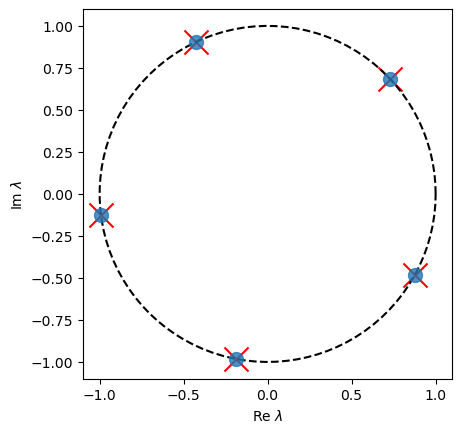

In [23]:
# Analytical predictions
analytical_quasienergies = du.quasi_energies(phi, representative_state)

# Builds the model for that and diagonalized the projected operator
analytical_model_sector = fp.FreeModel(U_sector, unitary=True)
analytical_model_sector.diagonalize_operator(projector@Zx@projector.conj().T, delete_diagonal=False)
numerical_eigenvalues, numerical_eigenstates = analytical_model_sector.diagonalization

# Eigenvalues
fig, ax = qmb.plot_quasienergies(numerical_eigenvalues, s=100, alpha=0.8, zorder=2)
ax.scatter(analytical_quasienergies.real, analytical_quasienergies.imag, marker='x', s=300, color="red")
fig.show()

Here we can see the multiplicity of the phases we pick up:

In [24]:
du.cumulative_scattering(representative_state)

array([0, 2, 3, 4, 6, 6])

In [25]:
# Checks whether the analytical expression matches the numerics

numerical_eigenstates = analytical_model_sector.diagonalization[1]

for _ in range(L):
    print("Find match for the " + str(_) + "-th analytical eigenstate")
    for numerical in numerical_eigenstates.T:
        correct, global_phase = qmb.same_state(du.circuit_eigenstate(phi, _, representative_state), numerical, return_differences=True)

        if correct:
            print("Correct!\n > Eigenvector. Global phase difference of: " + str(global_phase[0]))

Find match for the 0-th analytical eigenstate
Correct!
 > Eigenvector. Global phase difference of: -0.12074600138222319
Find match for the 1-th analytical eigenstate
Correct!
 > Eigenvector. Global phase difference of: -2.3020861709126232
Find match for the 2-th analytical eigenstate
Correct!
 > Eigenvector. Global phase difference of: 0.20748497732102764
Find match for the 3-th analytical eigenstate
Correct!
 > Eigenvector. Global phase difference of: 0.4690049422393043
Find match for the 4-th analytical eigenstate
Correct!
 > Eigenvector. Global phase difference of: -1.3818335150652337
